In [1]:
import json 
import os
import cv2
import matplotlib.pyplot as plt

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
./01.jpg
anno_json >>  {'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}
bbox >>  [468.94, 92.01, 171.06, 248.45]
yolo 좌표 변경 값 >>  1 0.86484375 0.45 0.2671875 0.5166666666666667
01
anno_json >>  {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}
bbox >>  [3.96, 183.38, 200.88, 214.03]
yolo 좌표 변경 값 >>  0 0.1609375 0.6041666666666666 0.3125 0.44583333333333336
01


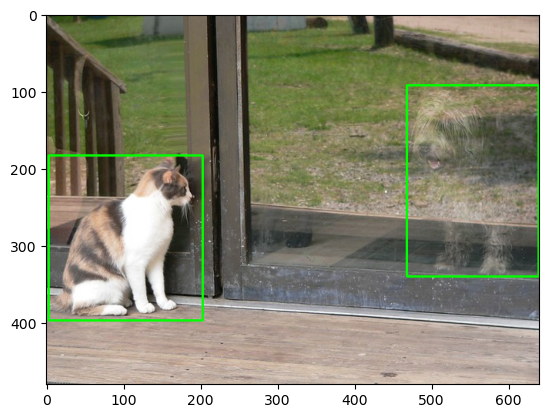

In [5]:
# 1. json 경로 선언 
json_path = "./instances_default.json"

# 2. json 읽기 
with open(json_path, 'r', encoding='utf-8') as f :
    json_data = json.load(f)
    
# 3. categories, images, annotations -> COCO dataset 기준 
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

label_dict = {1 : 0 , 2 : 1}

# 4. images_info 정보 가져오기 name, width, height, image_id
for image_json in images_info : 
    print(image_json)
    image_id = image_json['id']
    image_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    
    image_path = os.path.join("./", image_name)
    print(image_path)
    
    # image 읽기 
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #5. bbox info 정보 가져오기 
    for anno_json in annotations_info : 
        print("anno_json >> " , anno_json)
        if image_id == anno_json['image_id'] : 
            bbox = anno_json['bbox']
            print("bbox >> " , bbox)
            
            # float -> int 
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            
            #6. 라벨정보 가져오기 
            category_id = anno_json['category_id']
            label_number = label_dict[category_id]
            
            #7. xywh -> centerX, centerY, w, h 변환 하기 
            center_x = ((2 * x + w)/(2 * image_width))
            center_y = ((2 * y + h)/(2 * image_height))
            yolo_w = w/image_width
            yolo_h = h/image_height
            
            print("yolo 좌표 변경 값 >> ",label_number, center_x, center_y, yolo_w, yolo_h)
            
            
            # yolo 라벨 이름은 -> 이미지에 이름과 동일해야 함. 
            # ex) aaa.png -> aaa.txt
            
            #8. 텍스 파일 쓰기 
            file_name_temp = image_name.replace(".jpg" , "")
            print(file_name_temp)
            
        # 폴더 생성 
        os.makedirs("./label_data/", exist_ok=True)
        with open(f'./label_data/{file_name_temp}_json.txt','a') as f :
            f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")
        
        
            
            
            # 박스 그리기 
            cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
        
    plt.imshow(image)
    plt.show()